<a href="https://colab.research.google.com/github/shaon11579/DNN-fall-2021/blob/main/8740_eural_network_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

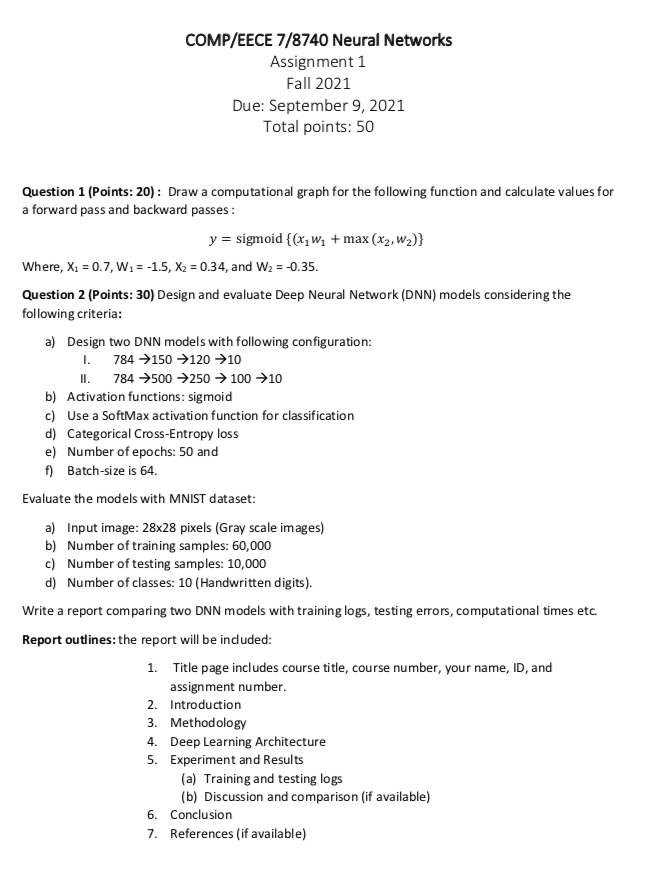

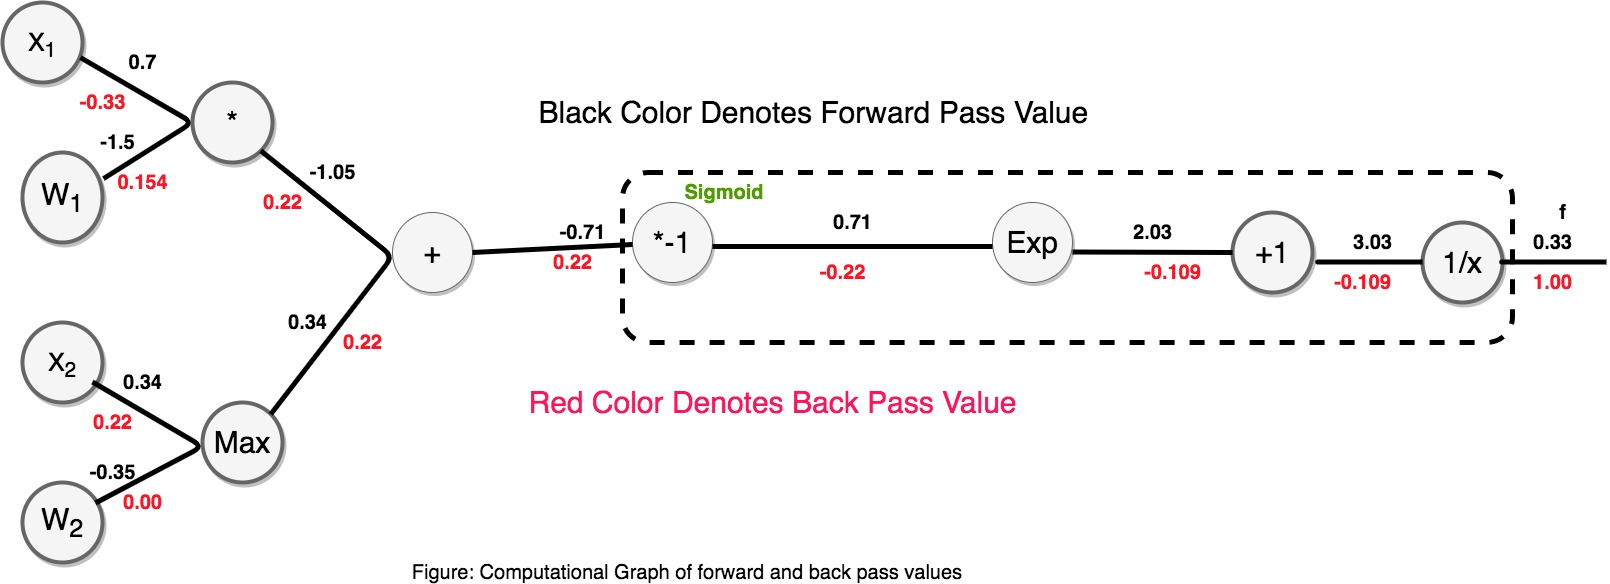

[link text](https://)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools

In [52]:
import sys 
import numpy as np 
import matplotlib 


In [53]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [54]:
# Hyperparameters for our network
#source: https://towardsdatascience.com/building-neural-network-using-pytorch-84f6e75f9a
input_size = 784
hidden_sizes = [150, 120]
output_size = 10
# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.Sigmoid(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.Sigmoid(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=150, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=150, out_features=120, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=120, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [56]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))

model

Sequential(
  (fc1): Linear(in_features=784, out_features=150, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=150, out_features=120, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=120, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Question 2 part B: Evaluate MNIST data, Write a report comparing two DNN models with training logs, testing errors, computational times etc.


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


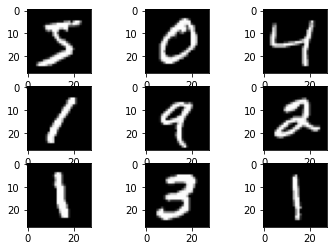

In [57]:

# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [59]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [60]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [61]:
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [63]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [64]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [65]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [66]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [67]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [68]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

In [69]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

In [70]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


> 98.675
> 98.533
> 98.650
> 98.767
> 98.925


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


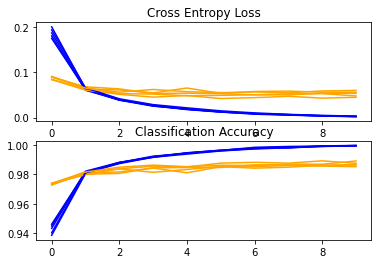

Accuracy: mean=98.710 std=0.131, n=5


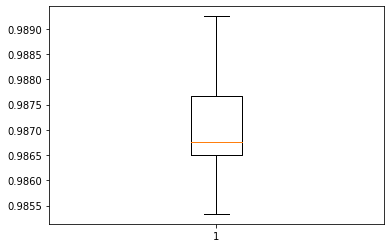

In [71]:
# entry point, run the test harness
run_test_harness()

In [1]:


# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [2]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

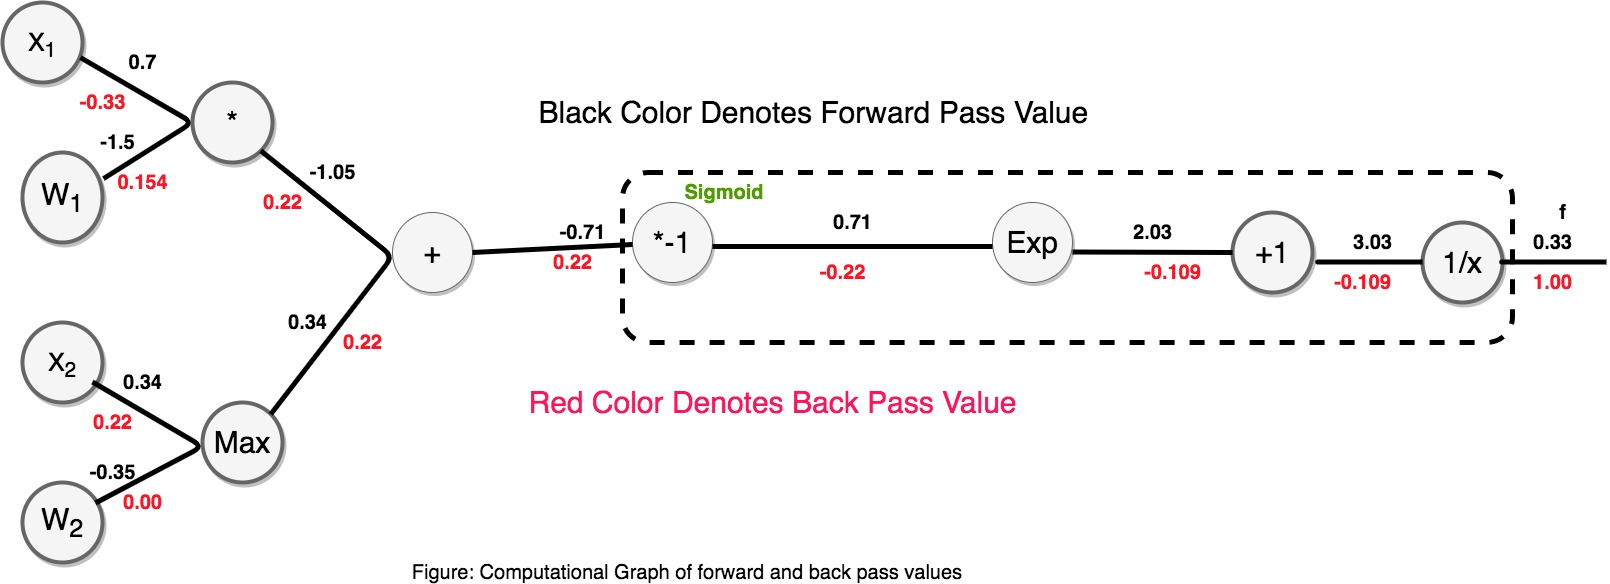

Question 2 solution 


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

from tensorflow import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.optimizers import Adam ,RMSprop
from keras import  backend as K


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


from subprocess import check_output



# Any results you write to the current directory are saved as output.

In [5]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


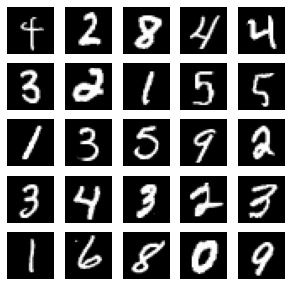

In [6]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

In [8]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [9]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size
print(x_train.shape)

(60000, 28, 28)


In [11]:
print(x_test.shape)

(10000, 28, 28)


In [12]:
print(y_train.shape)

(60000, 10)


In [13]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [14]:
# network parameters
batch_size = 64
epochs=50
hidden_units = [784,150,120,10]


In [15]:
# model is a 3-layer MLP with sigmoid and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units[0], input_dim=input_size))
model.add(Activation('sigmoid'))
model.add(Dense(hidden_units[1]))
model.add(Activation('sigmoid'))
model.add(Dense(hidden_units[2]))
model.add(Activation('sigmoid'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [16]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
activation (Activation)      (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               117750    
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               18120     
_________________________________________________________________
activation_2 (Activation)    (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

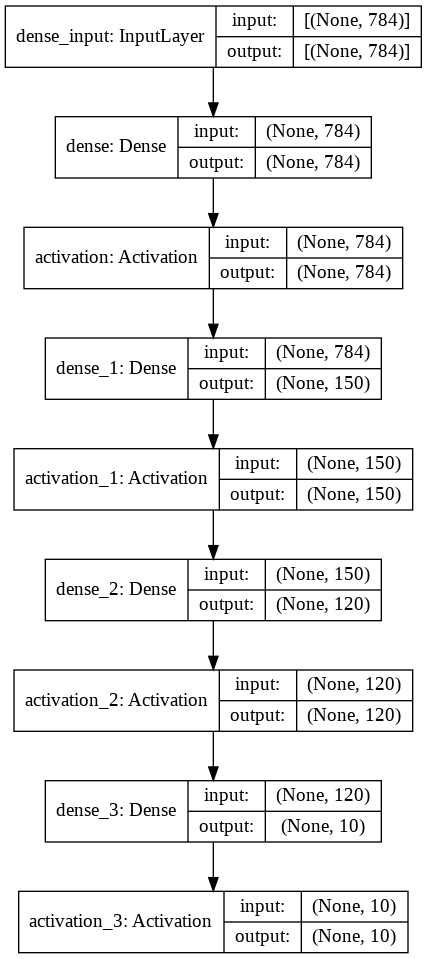

In [17]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [18]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
import time 
t0=time.time()
history=model.fit(x_train, y_train, epochs=50, batch_size=batch_size)
t1=time.time()



Epoch 1/50
938/938 [==============================] - 6s 4ms/step - loss: 0.4657 - accuracy: 0.8709
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1608 - accuracy: 0.9516
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1073 - accuracy: 0.9682
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0778 - accuracy: 0.9765
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0597 - accuracy: 0.9815
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0432 - accuracy: 0.9867
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0345 - accuracy: 0.9891
Epoch 8/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0256 - accuracy: 0.9924
Epoch 9/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0205 - accuracy: 0.9937
Epoch 10/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0172 - accuracy: 0.9946

In [21]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

157/157 [==============================] - 1s 3ms/step - loss: 0.1076 - accuracy: 0.9856

Test accuracy: 98.6%


In [22]:
print(loss)

0.1076003909111023


In [23]:
print(history.history.keys())
print(history.history['accuracy'])

dict_keys(['loss', 'accuracy'])
[0.8708500266075134, 0.9515833258628845, 0.9681500196456909, 0.9765333533287048, 0.9815000295639038, 0.9866833090782166, 0.9890833497047424, 0.9924333095550537, 0.9936666488647461, 0.9946333169937134, 0.9959333539009094, 0.996483325958252, 0.9963499903678894, 0.9977166652679443, 0.9977499842643738, 0.9980499744415283, 0.9975833296775818, 0.9984166622161865, 0.9990666508674622, 0.9972500205039978, 0.9995166659355164, 0.9978166818618774, 0.9987000226974487, 0.9993333220481873, 0.9985666871070862, 0.9988333582878113, 0.9987166523933411, 0.9996833205223083, 0.9987999796867371, 0.9993833303451538, 0.9994666576385498, 0.9984666705131531, 0.9992333054542542, 0.9997333288192749, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


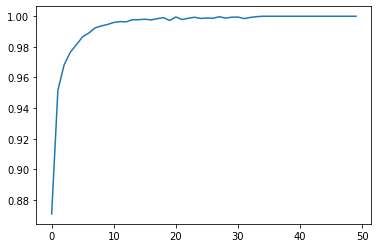

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

In [25]:
print(history.history['loss'])

[0.4657436013221741, 0.1607607901096344, 0.10726644098758698, 0.07779087871313095, 0.05966635420918465, 0.043209508061409, 0.03446261212229729, 0.025556838139891624, 0.020535975694656372, 0.01722756028175354, 0.013115585781633854, 0.010906224139034748, 0.011266893707215786, 0.00726028997451067, 0.0073827398009598255, 0.0066963559947907925, 0.00758398836478591, 0.00485421996563673, 0.0030882484279572964, 0.00808537844568491, 0.0016727600013837218, 0.006682895589619875, 0.0038240996655076742, 0.0021866648457944393, 0.004677838645875454, 0.0031715871300548315, 0.004617013037204742, 0.0011094079818576574, 0.004044517409056425, 0.002281161490827799, 0.0018773345509544015, 0.005046242848038673, 0.0022868697997182608, 0.0011511881602928042, 0.00011318059114273638, 3.1785108149051666e-05, 1.754904405970592e-05, 1.2776120456692297e-05, 9.43502709560562e-06, 6.882954039610922e-06, 4.986232397641288e-06, 3.5187172215955798e-06, 2.4557907636335585e-06, 1.6925159798120148e-06, 1.155482891590509e-06

II. 784 →500 →250 → 100 →10
b) Activation functions: sigmoid
c) Use a SoftMax activation function for classification
d) Categorical Cross-Entropy loss
e) Number of epochs: 50 and
f) Batch-size is 64.
Evaluate the models with MNIST dataset:
a) Input image: 28x28 pixels (Gray scale images)
b) Number of training samples: 60,000
c) Number of testing samples: 10,000
d) Number of classes: 10 (Handwritten digits).

Solution to Q2 part b 


In [26]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [27]:
# network parameters
batch_size = 64
epochs=50
hidden_units = [784,500,250,100,10]

In [28]:
# model is a 3-layer MLP with sigmoid and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units[0], input_dim=input_size))
model.add(Activation('sigmoid'))
model.add(Dense(hidden_units[1]))
model.add(Activation('sigmoid'))
model.add(Dense(hidden_units[2]))
model.add(Activation('sigmoid'))
model.add(Dense(hidden_units[3]))
model.add(Activation('sigmoid'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [29]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 784)               615440    
_________________________________________________________________
activation_4 (Activation)    (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_5 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 250)               125250    
_________________________________________________________________
activation_6 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)              

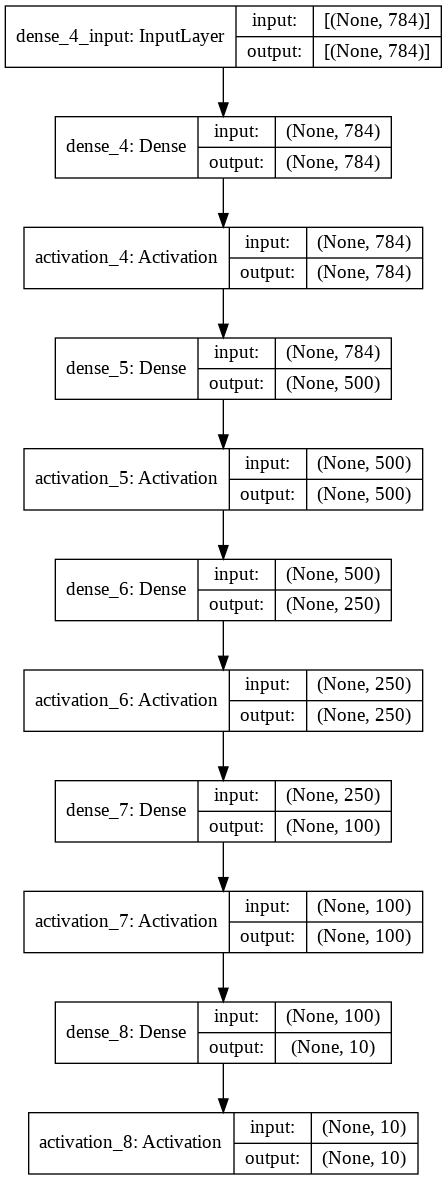

In [30]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [31]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
import time 
t0=time.time()
history=model.fit(x_train, y_train, epochs=50, batch_size=batch_size)
t1=time.time()

Epoch 1/50
938/938 [==============================] - 5s 5ms/step - loss: 2.3105 - accuracy: 0.1024
Epoch 2/50
938/938 [==============================] - 4s 5ms/step - loss: 2.3058 - accuracy: 0.1059
Epoch 3/50
938/938 [==============================] - 4s 5ms/step - loss: 2.3037 - accuracy: 0.1085
Epoch 4/50
938/938 [==============================] - 4s 5ms/step - loss: 2.3033 - accuracy: 0.1069
Epoch 5/50
938/938 [==============================] - 4s 5ms/step - loss: 2.3029 - accuracy: 0.1091
Epoch 6/50
938/938 [==============================] - 4s 5ms/step - loss: 2.3026 - accuracy: 0.1100
Epoch 7/50
938/938 [==============================] - 4s 5ms/step - loss: 2.3024 - accuracy: 0.1093
Epoch 8/50
938/938 [==============================] - 4s 5ms/step - loss: 2.3025 - accuracy: 0.1085
Epoch 9/50
938/938 [==============================] - 4s 5ms/step - loss: 2.3023 - accuracy: 0.1100
Epoch 10/50
938/938 [==============================] - 4s 5ms/step - loss: 2.3023 - accuracy: 0.1086

In [33]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

157/157 [==============================] - 1s 3ms/step - loss: 2.3018 - accuracy: 0.1135

Test accuracy: 11.3%


In [34]:
print(loss)

2.301771640777588


In [35]:
print(history.history.keys())
print(history.history['accuracy'])

dict_keys(['loss', 'accuracy'])
[0.10239999741315842, 0.10586666315793991, 0.10846666991710663, 0.10691666603088379, 0.10908333212137222, 0.10999999940395355, 0.10930000245571136, 0.10846666991710663, 0.10996666550636292, 0.1086166650056839, 0.1102166697382927, 0.10938332974910736, 0.11060000211000443, 0.10961666703224182, 0.11069999635219574, 0.1104833334684372, 0.11029999703168869, 0.10823333263397217, 0.10988333076238632, 0.10988333076238632, 0.11086666584014893, 0.1091499999165535, 0.11100000143051147, 0.10988333076238632, 0.10996666550636292, 0.11015000194311142, 0.10916666686534882, 0.1111166700720787, 0.11043333262205124, 0.11095000058412552, 0.10864999890327454, 0.11010000109672546, 0.10946666449308395, 0.11073333024978638, 0.10966666787862778, 0.11143333464860916, 0.10890000313520432, 0.10989999771118164, 0.11079999804496765, 0.11100000143051147, 0.109866663813591, 0.108883336186409, 0.10849999636411667, 0.1105833351612091, 0.10998333245515823, 0.10946666449308395, 0.111400000

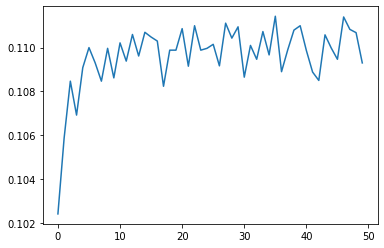

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

In [38]:
print(history.history['loss'])

[2.3104681968688965, 2.3057520389556885, 2.3036696910858154, 2.3033127784729004, 2.3029236793518066, 2.3025827407836914, 2.3024327754974365, 2.3025074005126953, 2.302255392074585, 2.3022921085357666, 2.302196979522705, 2.302151679992676, 2.302530527114868, 2.3022851943969727, 2.3022584915161133, 2.3023016452789307, 2.3023436069488525, 2.302161693572998, 2.302241086959839, 2.3022258281707764, 2.302182197570801, 2.302285671234131, 2.3021914958953857, 2.302375555038452, 2.302220582962036, 2.302351236343384, 2.302232265472412, 2.3022141456604004, 2.3021962642669678, 2.3024489879608154, 2.3022279739379883, 2.3022894859313965, 2.3023428916931152, 2.3022823333740234, 2.302183151245117, 2.3022210597991943, 2.30220365524292, 2.3022677898406982, 2.3023080825805664, 2.3023202419281006, 2.302358388900757, 2.302064895629883, 2.3023853302001953, 2.302251100540161, 2.3022196292877197, 2.302338123321533, 2.3022549152374268, 2.3022632598876953, 2.3022620677948, 2.3022043704986572]


In [39]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

In [40]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


> 98.658
> 98.583
> 98.525
> 98.875
> 98.642


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


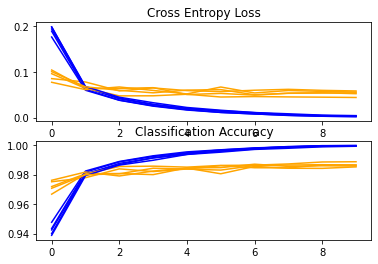

Accuracy: mean=98.657 std=0.119, n=5


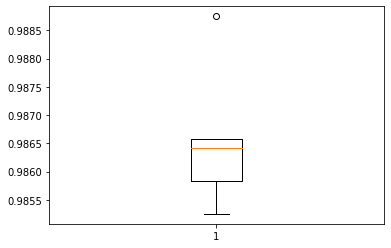

In [51]:
# entry point, run the test harness
run_test_harness()